# Q14
MLR-Pizza Sales 
The owner of Bangalore Pizza restaurant chain wants to predict the sale of his speciality Thin Crust Masala Pizza. 
He gathered data on monthly sales at his restaurant and potentially relevant variables for 15 outlets across Karnataka. The data is provided in MLR_Q14_PizzaSales. 
File link: https://drive.google.com/drive/folders/1ILKastUTJWccxaxIpJpjqCJDpsMJ-oC8

Questions

    1) Estimate the MLR model coefficients. 
    2) Is there evidence of violation of any key assumption of regression analysis?
    3) Which variable among these would you choose to remove and why? 
    4) Will removing that variable increase the overall explanatory power of the model?  

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [14]:
df = pd.read_csv("MLR_Q14_PizzaSales.csv")\
       .assign(Average_Price = lambda df: df['Average Price'].str.replace('\\$|,', '', regex=True).astype(float))\
       .assign(Monthly_Advertising_Expenditures = lambda df: df['Monthly Advertising Expenditures'].str.replace('\\$|,', '', regex=True).astype(float))\
       .assign(Disposable_Income_per_Household = lambda df: df['Disposable Income per Household'].str.replace('\\$|,', '', regex=True).astype(float))\
       .assign(Quantity_Sold = lambda df: df['Quantity Sold'].str.replace('\\$|,', '', regex=True).astype(float))\
       .drop(["Quantity Sold", "Average Price", "Monthly Advertising Expenditures", "Disposable Income per Household"], axis=1)

df.head(2)

,Outlet Number,Average_Price,Monthly_Advertising_Expenditures,Disposable_Income_per_Household,Quantity_Sold
0,1,10.14,64800.0,42100.0,85300.0
1,2,10.88,42800.0,38300.0,40500.0


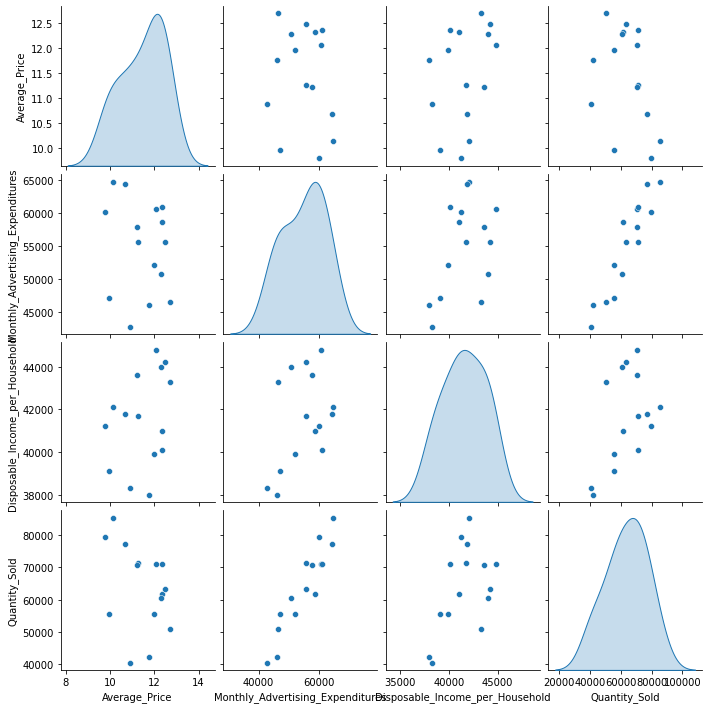

In [15]:
sns.pairplot(data = df[["Average_Price", "Monthly_Advertising_Expenditures", 
                        "Disposable_Income_per_Household", "Quantity_Sold"
                       ]], 
             diag_kind='kde')
plt.show()

In [16]:
def fit_lin_reg_with_intercept(X, Y):
    X = sm.add_constant(X) # adding a constan
    reg_model = sm.OLS(Y,X).fit()
    return reg_model

In [27]:
x_var = ["Average_Price", "Monthly_Advertising_Expenditures", "Disposable_Income_per_Household"]
reg_model = fit_lin_reg_with_intercept(X=df[x_var], Y=df[["Quantity_Sold"]])
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Quantity_Sold   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     69.17
Date:                Fri, 20 May 2022   Prob (F-statistic):           2.00e-07
Time:                        06:03:36   Log-Likelihood:                -140.63
No. Observations:                  15   AIC:                             289.3
Df Residuals:                      11   BIC:                             292.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

C:\Users\kumarmanglam.thakur\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


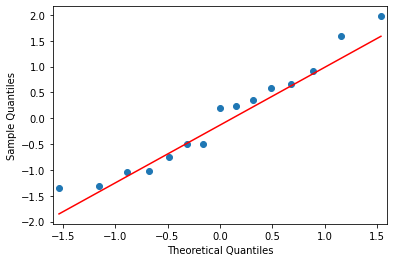

In [28]:
residuals = reg_model.resid 
sm.qqplot(residuals, fit=True, line="q")
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# strong multicollinearity among Monthly_Advertising_Expenditures and Disposable_Income_per_Household
#   remove Disposable_Income_per_Household
# strong multicollinearity among Monthly_Advertising_Expenditures and Average_Price
#   remove Average_Price


x_var = x_var = ["Average_Price", "Monthly_Advertising_Expenditures"]
X = df[x_var]
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], index=X.columns)

Average_Price                       39.906516
Monthly_Advertising_Expenditures    39.906516
dtype: float64

In [24]:
x_var = ["Monthly_Advertising_Expenditures"]
reg_model = fit_lin_reg_with_intercept(X=df[x_var], Y=df[["Quantity_Sold"]])
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Quantity_Sold   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     88.84
Date:                Thu, 19 May 2022   Prob (F-statistic):           3.56e-07
Time:                        21:29:21   Log-Likelihood:                -147.61
No. Observations:                  15   AIC:                             299.2
Df Residuals:                      13   BIC:                             300.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

C:\Users\kumarmanglam.thakur\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


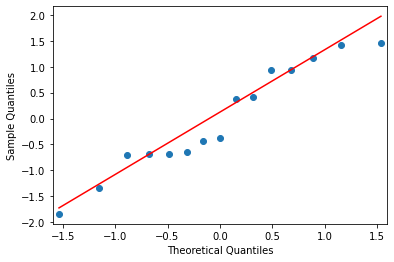

In [25]:
residuals = reg_model.resid 
sm.qqplot(residuals, fit=True, line="q")
plt.show()

## Answers

    1) Estimate the MLR model coefficients. 
    -3.266e+04 + 1.7548 * Monthly_Advertising_Expenditures
    2) Is there evidence of violation of any key assumption of regression analysis?
        i. The Durbin-Watson stat is 1.449, which is less than 2. It means that the residuals are positively auto-correlated. The no autocorrelation in residuals assumption is violeted. 
        ii. From QQ Plot, we can also observe that residuals are not distributed normally.
    3) Which variable among these would you choose to remove and why? 
    To remove multi-collinearity, the two variables Disposable_Income_per_Household and Average_Price, should be removed before fitting model.
    4) Will removing that variable increase the overall explanatory power of the model?  
    The R square of the model decreased when we removed the variables. With all the variables, the R square is 95%, but after removing the two variables, the R square is 87.2%. So the overall explanatory power of the model has decreased.